<a href="https://colab.research.google.com/github/GildasTaliah/NatLangPro_py/blob/main/SpokeNLP_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DESCRIPTION**
We learn to speak far before we learn to read. Even in the digital age, our main method of communication is speech. Spoken Language Processing with Python will help you load, transform and transcribe audio files. You'll start by seeing what raw audio looks like in Python. And then finish by working through an example business use case, transcribing and classifying phone call data.

# **1. Introduction To Spoken Language Processing with Python**
Audio files are different from most other types of data. Before you can start working with them, they require some preprocessing. In this chapter, you'll learn the first steps to working with speech files by converting two different audio files into soundwaves and comparing them visually.

- Movies show on average **30 pictures per second** which our brain registers as moving imgaes, the sampling rate of an audio file is a measure of data chunks per second used to represent a digital sound, with **1 kHz (digital sounds measure in frequency) equalling 1000 pieces of information per second**.
- For example a typical song usually have **32kHz sampling rate**  This means 32,000 pieces of information per second. Speech and audio books are usually between 8 and 16 kHz.





**The right frequency**

Movies play multiple pictures per second succession to give the illusion of moving pictures, sound is similar but usually at a much larger rate. What's the standard unit of measure for sound frequency?

- That's it! Our audio files have been 48 kHz so far, that's 48,000 cycles per second!

Importing an audio file with Python
You've seen how there are different kinds of audio files and how streaming music and spoken language have different sampling rates. But now we want to start working with these files.

To begin, we're going to import the good_morning.wav audio file using Python's in-built wave library. Then we'll see what it looks like in byte form using the built-in readframes() method.

You can listen to good_morning.wav here [Link](https://assets.datacamp.com/production/repositories/4637/datasets/d30b8e2319792fb3e9d7ce1e469b15ecf3f75227/good-morning.wav).

Remember, good_morning.wav is only a few seconds long but at 48 kHz, that means it contains 48,000 pieces of information per second.

In [ ]:
# Downlod audio
import requests

url = "https://assets.datacamp.com/production/repositories/4637/datasets/\
d30b8e2319792fb3e9d7ce1e469b15ecf3f75227/good-morning.wav"

response = requests.get(url)

with open("good_morning.wav", "wb") as file:
    file.write(response.content)
print('File successfully downloaded')

File successfully downloaded


In [ ]:
import wave

# Create audio file wave object
good_morning = wave.open('good_morning.wav', 'r')

# Read all frames from wave object
# The -1 means we want to read in all of the pieces of information within the wave_object.
signal_gm = good_morning.readframes(-1)

# View first 10
print(signal_gm[:10])
print('\n', "Boom! You've just imported your first audio file and seen what it looks like with pure Python. Now let's convert it something more readable." )


b'\xfd\xff\xfb\xff\xf8\xff\xf8\xff\xf7\xff'

 Boom! You've just imported your first audio file and seen what it looks like with pure Python. Now let's convert it something more readable.


- Our good morning sound wave is a freqquency of 48 kHz and a length of 2 seconds

In [ ]:
# Pieces of information
# kHz and length of audio
kHz, length = 48 * 1000, 2
info = kHz * length
print('Pieces of info: ', info)
#print(good_morning.getnframes())

Pieces of info:  96000


**Finding the frame**

 $$\mathbf{Frequency(Hz) = \frac{Lenght Of Wave Object Array}{ Duration Of Audio Files (in second)}}$$

**The right data type**

dtype defaults to float in np.frombuffer(), what's the correct dtype to set it to for visualizing sound wave bytes?

You can try the different options by running np.frombuffer(signal_gm, dtype=____).
- Nice! The 'int16' data type returns positive and negative integers, just as we wanted. Our sound wave integers will be ready to plot in no time!

**Bytes to integers**

You've seen how to import and read an audio file using Python's wave module and the readframes() method. But doing that results in an array of bytes.

To convert the bytes into something more useful, we'll use NumPy's frombuffer() method.

Passing frombuffer() our sound waves bytes and indicating a dtype of 'int16', we can convert our bytes to integers. Integers are much easier to work with than bytes.

The Python wave library has already been imported along with the good_morning.wav audio file.

In [ ]:
import numpy as np

# Open good morning sound wave and read frames as bytes
good_morning = wave.open('good_morning.wav', 'r')
signal_gm = good_morning.readframes(-1)

# Convert good morning audio bytes to integers
soundwave_gm = np.frombuffer(signal_gm, dtype='int16')

# View the first 10 sound wave values
print(soundwave_gm[:10], '\n')

"Great effort! You've read in an audio file with Python and converted into to integers, that's the first step towards speech recognition!"

[ -3  -5  -8  -8  -9 -13  -8 -10  -9 -11] 



"Great effort! You've read in an audio file with Python and converted into to integers, that's the first step towards speech recognition!"

**Finding the time stamps**

We know the frequency of our sound wave is 48 kHz, but what if we didn't? We could find it by dividing the length of our sound wave array by the duration of our sound wave. However, Python's wave module has a better way. Calling getframerate() on a wave object returns the frame rate of that wave object.

We can then use NumPy's linspace() method to find the time stamp of each integer in our sound wave array. This will help us visualize our sound wave in the future.

The linspace() method takes start, stop and num parameters and returns num evenly spaced values between start and stop.

In our case, start will be zero, stop will be the length of our sound wave array over the frame rate (or the duration of our audio file) and num will be the length of our sound wave array.

In [ ]:
# Read in sound wave and convert from bytes to integers
good_morning = wave.open('good_morning.wav', 'r')
signal_gm = good_morning.readframes(-1)
soundwave_gm = np.frombuffer(signal_gm, dtype='int16')

# Get the sound wave frame rate
framerate_gm = good_morning.getframerate()
print('Lenght of Wave object: ', len(soundwave_gm) ,'Frame rate: ', framerate_gm)

# Find the sound wave timestamps
time_gm = np.linspace(start=0,
                      stop=len(soundwave_gm)/framerate_gm,
                      num=len(soundwave_gm))

# Print the first 10 timestamps
print("Let's check out the first 10 timestamps. Each of these values is the time in seconds where each sound wave byte occurred.", '\n')
print(time_gm[:10], '\n')

"Nice! You've done some great data manipulation to our good morning sound wave. Now we'll use all your hard work to plot it and see what it looks like!"

Lenght of Wave object:  249984 Frame rate:  48000
Let's check out the first 10 timestamps. Each of these values is the time in seconds where each sound wave byte occurred. 

[0.00000000e+00 2.08334167e-05 4.16668333e-05 6.25002500e-05
 8.33336667e-05 1.04167083e-04 1.25000500e-04 1.45833917e-04
 1.66667333e-04 1.87500750e-04] 



"Nice! You've done some great data manipulation to our good morning sound wave. Now we'll use all your hard work to plot it and see what it looks like!"

- **Amplitudde** : The y-axis is the amplitude or how much the sound wave displaces air particles as it moves through the air. A value of 0 indicates no sound at all.

**Staying consistent**

Why is it important to ensure the same data transformations are performed on all of your audio files?
- To ensure data consistency and prevent potential data mismatches.Correct! Performing the same transformations on all of audio files, allows us to work with them in a consistent manner.

**Processing audio data with Python**
You've seen how a sound waves can be turned into numbers but what does all that conversion look like?

And how about another similar sound wave? One slightly different?

In this exercise, we're going to use MatPlotLib to plot the sound wave of good_morning against good_afternoon.

To have the good_morning and good_afternoon sound waves on the same plot and distinguishable from each other, we'll use MatPlotLib's alpha parameter.

You can listen to the good_afternoon audio [here](https://assets.datacamp.com/production/repositories/4637/datasets/16379ca3c3689f5f7cfb3de20585cb6da609294b/good-afternoon.wav) and good_morning audio [here](https://assets.datacamp.com/production/repositories/4637/datasets/d30b8e2319792fb3e9d7ce1e469b15ecf3f75227/good-morning.wav).

In [ ]:
# Download good afternoon
url = "https://assets.datacamp.com/production/repositories/4637/datasets/16379ca3c3689f5f7cfb3de20585cb6da609294b/good-afternoon.wav"

response = requests.get(url)

with open("good_afternoon.wav", "wb") as file:
    file.write(response.content)
print('File successfully downloaded')

File successfully downloaded


In [ ]:
# Open good afternoon sound wave

good_afternoon = wave.open('good_afternoon.wav', 'r')
signal_ga = good_afternoon.readframes(-1)

# convert good afternoon bytes to integers
soundwave_ga = np.frombuffer(signal_ga, dtype='int16')

# View first 10 sound wave values
print(soundwave_ga[:10], '\n')

# Get the sound wave frame rate
framerate_ga = good_afternoon.getframerate()
print('Lenght of Wave object: ', len(soundwave_ga) ,'Frame rate: ', framerate_ga, '\n')

[-79 -54 -80 -49 -85 -45 -87 -51 -87 -58] 

Lenght of Wave object:  332288 Frame rate:  48000 



In [ ]:
## Data Transformation
# Ensure equality in length
soundwave_ga = soundwave_ga[:len(soundwave_gm)]
print('Lenght of Wave object: ', len(soundwave_ga),'Frame rate: ', framerate_ga)
print('Lenght of Wave object: ', len(soundwave_gm) ,'Frame rate: ', framerate_gm)

# Find the sound wave timestamps
time_ga = np.linspace(start=0,
                      stop=len(soundwave_ga)/framerate_ga,
                      num=len(soundwave_ga))
print('Length time ga: ', len(time_ga))
print('Length time gm: ', len(time_gm))
time_gm = time_gm[:len(time_ga)]
print('Length time gm: ', len(time_gm))

# Print the first 10 timestamps
print("Let's check out the first 10 timestamps. Each of these values is the time in seconds where each sound wave byte occurred.", '\n')
print(time_ga[:10], '\n')

Lenght of Wave object:  249984 Frame rate:  48000
Lenght of Wave object:  249984 Frame rate:  48000
Length time ga:  249984
Length time gm:  249984
Length time gm:  249984
Let's check out the first 10 timestamps. Each of these values is the time in seconds where each sound wave byte occurred. 

[0.00000000e+00 2.08334167e-05 4.16668333e-05 6.25002500e-05
 8.33336667e-05 1.04167083e-04 1.25000500e-04 1.45833917e-04
 1.66667333e-04 1.87500750e-04] 



In [ ]:
# Check equity
print('Lenght of Wave object: ', len(soundwave_ga) ,'Frame rate: ', framerate_ga, '\n')
print('Lenght of Wave object: ', len(soundwave_gm) ,'Frame rate: ', framerate_gm, '\n')

# print shapes
print(soundwave_ga.shape, soundwave_gm.shape)

Lenght of Wave object:  249984 Frame rate:  48000 

Lenght of Wave object:  249984 Frame rate:  48000 

(249984,) (249984,)


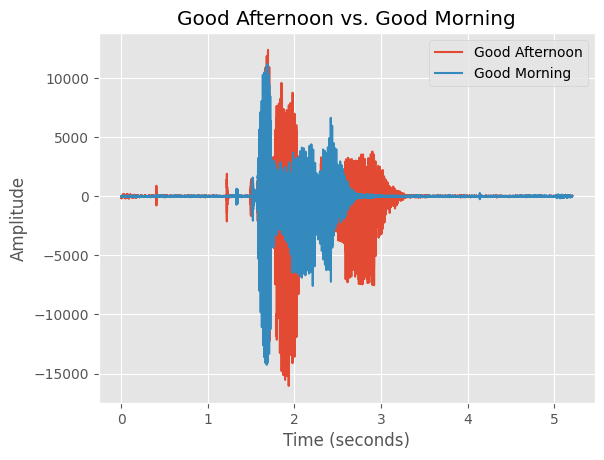

" Great effort! Notice the two sound waves are very similar in the beginning. Because the first word is good in both audio files, they almost completely overlap. A well-built speech recognition system would recognize this and return the same first word for each wave. Let's build one to do just that."

In [ ]:
# Setup the title and axis titles
from matplotlib import pyplot as plt
plt.style.use('ggplot')

plt.title('Good Afternoon vs. Good Morning')
plt.ylabel('Amplitude')
plt.xlabel('Time (seconds)')

# Add the Good Afternoon data to the plot
plt.plot(time_ga, soundwave_ga, label='Good Afternoon')

# Add the Good Morning data to the plot

plt.plot(time_gm, soundwave_gm, label='Good Morning')#,
   # Set the alpha variable to 0.5
  # alpha=0.5)

plt.legend()
plt.show()

" Great effort! Notice the two sound waves are very similar in the beginning. \
Because the first word is good in both audio files, they almost completely overlap. \
A well-built speech recognition system would recognize this and return the same \
first word for each wave. Let's build one to do just that."

# **2. Using the Python Speech Recognition Library**

Speech recognition is still far from perfect. But the SpeechRecognition library provides an easy way to interact with many speech-to-text APIs. In this section, you'll learn how to use the SpeechRecognition library to easily start converting the spoken language in your audio files to text.

Speech recognition is still far from perfect. But the SpeechRecognition library provides an easy way to interact with many speech-to-text APIs. In this section, you'll learn how to use the SpeechRecognition library to easily start converting the spoken language in your audio files to text.


Which of the following is not a speech recognition API within the speech_recognition library?

An instance of the Recognizer class has been created and saved to recognizer. You can try calling the API on recognizer to see what happens.
 **recognize_google_cloud()** **recognize_google()** **recognize_bing()** **what does this say()**

**Using the SpeechRecognition library**

To save typing speech_recognition every time, we'll import it as sr.

We'll also setup an instance of the Recognizer class to use later.

The energy_threshold is a number between 0 and 4000 for how much the Recognizer class should listen to an audio file.

energy_threshold will dynamically adjust whilst the recognizer class listens to audio.

In [ ]:
!pip install SpeechRecognition

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 9.4 MB/s eta 0:00:00


In [ ]:
# Importing the speech_recognition library
import speech_recognition as sr

# Create an instance of the Recognizer class
recognizer = sr.Recognizer()

# Set the energy threshold
recognizer.energy_threshold = 300

"The most important step done! Now you're ready to start accessing the speech_recognition library and use the Recognizer class!"

"The most important step done! Now you're ready to start accessing the speech_recognition library and use the Recognizer class!"

Using the Recognizer class
Now you've created an instance of the Recognizer class we'll use the recognize_google() method on it to access the Google web speech API and turn spoken language into text.

recognize_google() requires an argument audio_data otherwise it will return an error.

US English is the default language. If your audio file isn't in US English, you can change the language with the language argument. A list of language codes can be seen [here](https://cloud.google.com/speech-to-text/docs/speech-to-text-supported-languages).

An audio file containing English speech has been imported as clean_support_call_audio. You can listen to the audio file [here](https://assets.datacamp.com/production/repositories/4637/datasets/393a2f76d057c906de27ec57ea655cb1dc999fce/clean-support-call.wav).
Example codes; English (South Africa): **en-ZA**. English (Ghana): **en-GH**. German (Germany): **de-DE**. SpeechRecognition has also been imported as sr.

To avoid hitting the API request limit of Google's web API, we've mocked the Recognizer class to work with our audio files. This means some functionality will be limited.

In [ ]:
url = "https://assets.datacamp.com/production/repositories/4637/datasets/393a2f76d057c906de27ec57ea655cb1dc999fce/clean-support-call.wav"

response = requests.get(url)

with open("clean_support_call.wav", "wb") as file:
    file.write(response.content)
print('File successfully downloaded')

File successfully downloaded


In [ ]:
import speech_recognition as sr

# Assuming you've already created the AudioFile object
r = sr.Recognizer()

with sr.AudioFile('clean_support_call.wav') as source:
    # Read the entire audio file
    audio = r.record(source)

clean_support_call_audio = audio

In [ ]:
clean_support_call_audio

In [ ]:
import speech_recognition as sr

# Create a recognizer object
recognizer = sr.Recognizer()

# Open the audio file
with sr.AudioFile('clean_support_call.wav') as source:
    # Check type first time
    print('Type of file: ', type(source), '\n')

    # Read the entire audio file
    audio_data = recognizer.record(source)
    print('Type of file: ', type(audio_data), '\n')

    # Now transcribe the audio data
    try:
        text = recognizer.recognize_google(
            audio_data=audio_data,
            language="en-US"
        )
        print("Transcription:", text)
    except sr.UnknownValueError:
        print("Google Speech Recognition could not understand the audio")
    except sr.RequestError as e:
        print(f"Could not request results from Google Speech Recognition service; {e}")


print()
print(text, '\n')
"Massive effort! You just transcribed your first piece of audio using speech_recognition's \
Recognizer class! Well, we've set it a mock version of Recognizer so we don't hit the \
API max requests limit. Notice how the 'hello' wasn't seperate from the rest of the text. \
As powerful as recognize_google() is, it doesn't have sentence separation."

Type of file:  <class 'speech_recognition.AudioFile'> 

Type of file:  <class 'speech_recognition.audio.AudioData'> 

Transcription: hello I'd like to get some help setting up my account please

hello I'd like to get some help setting up my account please 



"Massive effort! You just transcribed your first piece of audio using speech_recognition's Recognizer class! Well, we've set it a mock version of Recognizer so we don't hit the API max requests limit. Notice how the 'hello' wasn't seperate from the rest of the text. As powerful as recognize_google() is, it doesn't have sentence separation."

**From AudioFile to AudioData**

As you saw earlier, there are some transformation steps we have to take to make our audio data useful. The same goes for SpeechRecognition.

In this exercise, we'll import the clean_support_call.wav audio file and get it ready to be recognized.

We first read our audio file using the AudioFile class. But the recognize_google() method requires an input of type AudioData.

To convert our AudioFile to AudioData, we'll use the Recognizer class's method record() along with a context manager. The record() method takes an AudioFile as input and converts it to AudioData, ready to be used with recognize_google().

SpeechRecognition has already been imported as sr.

- once more we use the Python **with**, to neatly open read and close file.

In [ ]:
text, text.split()[:2]

("hello I'd like to get some help setting up my account please",
 ['hello', "I'd"])

In [ ]:
# Instantiate Recognizer
recognizer = sr.Recognizer()

# Convert audio to AudioFile
clean_support_call = sr.AudioFile("clean_support_call.wav")

# Convert AudioFile to AudioData
with clean_support_call as source:
    clean_support_call_audio = recognizer.record(source)

# Transcribe AudioData to text
text = recognizer.recognize_google(clean_support_call_audio,
                                   language="en-US")
print(text, '\n')

"Nice! You've gone end to end with SpeechRecognition, you've imported an audio \
file, converted it to the right data type and transcribed it using Google's free web API! \
Now let's see a few more capabilities of the record() method."

hello I'd like to get some help setting up my account please 



"Nice! You've gone end to end with SpeechRecognition, you've imported an audio file, converted it to the right data type and transcribed it using Google's free web API! Now let's see a few more capabilities of the record() method."

**Recording the audio we need**
Sometimes you may not want the entire audio file you're working with. The duration and offset parameters of the record() method can help with this.

After exploring your dataset, you find there's one file, imported as **nothing_at_end**  [here](https://assets.datacamp.com/production/repositories/4637/datasets/ca799cf2a7b093c06e1a5ae1dd96a49d48d65efa/30-seconds-of-nothing-16k.wav) which has 30-seconds of silence at the end and a support call file, imported as **out_of_warranty** here[here](https://assets.datacamp.com/production/repositories/4637/datasets/dbc47d8210fdf8de42b0da73d1c2ba92e883b2d2/static-out-of-warranty.wav) has 3-seconds of static at the front.

Setting duration and offset means the record() method will record up to duration audio starting at offset. They're both measured in seconds.

In [ ]:
# import file and name: nothing at the end of it
url = "https://assets.datacamp.com/production/repositories/4637/datasets/ca799cf2a7b093c06e1a5ae1dd96a49d48d65efa/30-seconds-of-nothing-16k.wav"

response = requests.get(url)

with open("nothing_at_end.wav", "wb") as file:
    file.write(response.content)
print('File successfully downloaded')

# import file and name: out of warranty
url = "https://assets.datacamp.com/production/repositories/4637/datasets/dbc47d8210fdf8de42b0da73d1c2ba92e883b2d2/static-out-of-warranty.wav"

response = requests.get(url)

with open("out_of_warranty.wav", "wb") as file:
    file.write(response.content)
print('File successfully downloaded')

File successfully downloaded
File successfully downloaded


In [ ]:
# read file
nothing_at_end = sr.AudioFile("nothing_at_end.wav")
out_of_warranty = sr.AudioFile("out_of_warranty.wav")

# Instantiate Recognizer
recognizer = sr.Recognizer()
# Convert AudioFile to AudioData
with nothing_at_end as source:
    nothing_at_end_audio = recognizer.record(source,
                                             duration=10,
                                             offset=None)

# Transcribe AudioData to text
text = recognizer.recognize_google(nothing_at_end_audio,
                                   language="en-US")

print(text)



#
# Convert AudioFile to AudioData
with out_of_warranty as source:
    static_art_start_audio = recognizer.record(source,
                                               duration=None,
                                               offset=3)

# Transcribe AudioData to text
text = recognizer.recognize_google(static_art_start_audio,
                                   language="en-US")

print(text)

"That's much better! Speech recognition can be resource intensive, so in practice, \
you'll want to explore your audio files to make you're not wasting any compute power trying to transcribe static or silence."

this audio file has 30 seconds of nothing at the end of it
hello I'd like to get some help with my device please I think it's out of warranty I bought it about 2 years ago


"That's much better! Speech recognition can be resource intensive, so in practice, you'll want to explore your audio files to make you're not wasting any compute power trying to transcribe static or silence."

**Different kinds of audio**

Now you've seen an example of how the Recognizer class works. Let's try a few more. How about speech from a different language?

What do you think will happen when we call the recognize_google() function on a Japanese version of good_morning.wav (file) [here](https://assets.datacamp.com/production/repositories/4637/datasets/cd9b801670d0664275cdbd3a24b6b70a8c2e5222/good-morning-japanense.wav) (japanese_audio)?

The default language is "en-US", are the results the same with the "ja" tag?

How about non-speech audio? Like this leopard roaring (leopard_audio) [here]().

Or speech where the sounds may not be real words, such as a baby talking (charlie_audio) [here]()?

To familiarize more with the Recognizer class, we'll look at an example of each of these.

In [ ]:
# read Japenese audio
url = "https://assets.datacamp.com/production/repositories/4637/datasets/cd9b801670d0664275cdbd3a24b6b70a8c2e5222/good-morning-japanense.wav"

response = requests.get(url)

with open("japanese_audio.wav", "wb") as file:
    file.write(response.content)
print('File successfully downloaded')


# Leopard audio
url = "https://assets.datacamp.com/production/repositories/4637/datasets/cd9b801670d0664275cdbd3a24b6b70a8c2e5222/good-morning-japanense.wav"

response = requests.get(url)

with open("leopard_audio.wav", "wb") as file:
    file.write(response.content)
print('File successfully downloaded')


# Charlie audio: Baby talking
url = "https://assets.datacamp.com/production/repositories/4637/datasets/e9fd46a06d74431e3baa942c489e1b119d85a233/charlie-bit-me-5.wav"

response = requests.get(url)

with open("charlie_audio.wav", "wb") as file:
    file.write(response.content)
print('File successfully downloaded')

File successfully downloaded
File successfully downloaded
File successfully downloaded


In [ ]:
# read data from audio files
japanese_audio = sr.AudioFile("japanese_audio.wav")
leopard_audio = sr.AudioFile("leopard_audio.wav")
charlie_audio = sr.AudioFile("charlie_audio.wav")

In [ ]:
# Create a recognizer class
recognizer = sr.Recognizer()

# Pass the Japanese audio to recognize_google
with japanese_audio as source:
    japanese_audio = recognizer.record(source)
text = recognizer.recognize_google(japanese_audio, language="en-US")

# Print the text
print(text, '\n')

# Create a recognizer class
recognizer = sr.Recognizer()

# Pass the Japanese audio to recognize_google
text = recognizer.recognize_google(japanese_audio, language="ja")

# Print the text
print(text, '\n')

ohayo gozaimasu 

おはようございます 



In [ ]:
# Create a recognizer class
recognizer = sr.Recognizer()

# Pass the leopard audio to recognize_google
with leopard_audio as source:
    leopard_audio = recognizer.record(source)
text = recognizer.recognize_google(leopard_audio,
                                   language="en-US",
                                   show_all=True)

# Print the text
print(text, '\n')

# Create a recognizer class
recognizer = sr.Recognizer()

# Pass charlie_audio to recognize_google
with charlie_audio as source:
    charlie_audio = recognizer.record(source)
text = recognizer.recognize_google(charlie_audio,
                                   language="en-US")

# Print the text
print(text)


"What an effort! You've seen how the recognize_google() deals with different \
kinds of audio. It's worth noting the recognize_google() function is only going \
to return words, as in, it didn't return the baby saying 'ahhh!' because it doesn't\
 recognize it as a word. Speech recognition has come a long way but it's far from perfect. Let's push on!"

{'alternative': [{'transcript': 'ohayo gozaimasu', 'confidence': 0.48227233}, {'transcript': 'Ohio gozaimasu', 'confidence': 0.48227233}], 'final': True} 

Charlie Charlie Bit Me


"What an effort! You've seen how the recognize_google() deals with different kinds of audio. It's worth noting the recognize_google() function is only going to return words, as in, it didn't return the baby saying 'ahhh!' because it doesn't recognize it as a word. Speech recognition has come a long way but it's far from perfect. Let's push on!"

**Multiple Speakers 1**

If your goal is to transcribe conversations, there will be more than one speaker. However, as you'll see, the recognize_google() function will only transcribe speech into a single block of text.

You can hear in this audio file [here](https://assets.datacamp.com/production/repositories/4637/datasets/925c8c31d6e4af9c291c692f13e4f41c7b5e86b2/multiple-speakers-16k.wav) there are three different speakers.

But if you transcribe it on its own, recognize_google() returns a single block of text. Which is still useful but it doesn't let you know which speaker said what.

We'll see an alternative to this in the next exercise.

The multiple speakers audio file has been imported and converted to AudioData as multiple_speakers.

In [ ]:
# read
url = "https://assets.datacamp.com/production/repositories/4637/datasets/925c8c31d6e4af9c291c692f13e4f41c7b5e86b2/multiple-speakers-16k.wav"

response = requests.get(url)

with open("multiple_speakers.wav", "wb") as file:
    file.write(response.content)
print('File successfully downloaded')

File successfully downloaded


In [ ]:
# multiple speakers
#multiple_speakers = sr.AudioFile("multiple_speakers.wav")

# Create a recognizer class
recognizer = sr.Recognizer()

#
with sr.AudioFile('multiple_speakers.wav') as source:
    # Convert the audio to AudioData
    multiple_speakers = recognizer.record(source)
# Recognize the multiple speaker AudioData
text = recognizer.recognize_google(multiple_speakers,
                                   language="en-US")

# Print the text
print(text)

"Boom! You did it. But see how all of the speakers speech came out in one big block of text? In the next exercise we'll see a way of working around this."

what are the limitations of the speech recognition library is that it doesn't recognize different speakers and voices it would just return it all as one block a text


"Boom! You did it. But see how all of the speakers speech came out in one big block of text? In the next exercise we'll see a way of working around this."

**Multiple Speakers 2**

Deciphering between multiple speakers in one audio file is called speaker diarization. However, you've seen the free function we've been using, recognize_google() doesn't have the ability to transcribe different speakers.

One way around this, without using one of the paid speech to text services, is to ensure your audio files are single speaker.

This means if you were working with phone call data, you would make sure the caller and receiver are recorded separately. Then you could transcribe each file individually.

In this exercise, we'll transcribe each of the speakers in our multiple speakers audio file individually.


- Btw, multiple speakers in one audio file can be handled (e.g splitted) using **PyDub** package.

In [ ]:

#recognizer = sr.Recognizer()

# Multiple speakers on different files
#speakers = [sr.AudioFile("speaker_0.wav"),
 #           sr.AudioFile("speaker_1.wav"),
  #          sr.AudioFile("speaker_2.wav")]

# Transcribe each speaker individually
#for i, speaker in enumerate(speakers):
 #   with speaker as source:
  #      speaker_audio = recognizer.record(source)
   # print(f"Text from speaker {i}:")
    #print(recognizer.recognize_google(speaker_audio,
    #    							  language="en-US"))

"Nice work! Something to remember is I had to manually split the audio file into \
different speakers. You can see this solution still isn't perfect but it's easier \
to deal with than having a single block of text. You could think about automating \
this process in the future by having a model split the audio when it detects different \
speakers. For now, let's look into what happens when you've got noisy audio!"

"Nice work! Something to remember is I had to manually split the audio file into different speakers. You can see this solution still isn't perfect but it's easier to deal with than having a single block of text. You could think about automating this process in the future by having a model split the audio when it detects different speakers. For now, let's look into what happens when you've got noisy audio!"

**Working with noisy audio**

In this exercise, we'll start by transcribing a clean speech sample to text and then see what happens when we add some background noise.

A clean audio sample has been imported as clean_support_call.

Play clean support call [here](https://assets.datacamp.com/production/repositories/4637/datasets/393a2f76d057c906de27ec57ea655cb1dc999fce/clean-support-call.wav).

We'll then do the same with the noisy audio file saved as noisy_support_call. It has the same speech as clean_support_call [here](https://assets.datacamp.com/production/repositories/4637/datasets/f3edd5024944eac2f424b592840475890c86d405/2-noisy-support-call.wav) but with additional background noise.

Play noisy support call.

To try and negate the background noise, we'll take advantage of Recognizer's adjust_for_ambient_noise() function.

In [ ]:
# download noisy support call
url = "https://assets.datacamp.com/production/repositories/4637/datasets/f3edd5024944eac2f424b592840475890c86d405/2-noisy-support-call.wav"

response = requests.get(url)

with open("noisy_support_call.wav", "wb") as file:
    file.write(response.content)
print('File successfully downloaded')

File successfully downloaded


In [ ]:
recognizer = sr.Recognizer()

# read audio
clean_support_call = sr.AudioFile("clean_support_call.wav")
noisy_support_call = sr.AudioFile("noisy_support_call.wav")

# Record the audio from the clean support call
with clean_support_call as source:
  clean_support_call_audio = recognizer.record(source)

# Transcribe the speech from the clean support call
text = recognizer.recognize_google(clean_support_call_audio,
                                   language="en-US")

print(text)

hello I'd like to get some help setting up my account please


In [ ]:
recognizer = sr.Recognizer()

# Record the audio from the noisy support call
with noisy_support_call as source:
  noisy_support_call_audio = recognizer.record(source)

# Transcribe the speech from the noisy support call
text = recognizer.recognize_google(noisy_support_call_audio,
                                   language="en-US",
                                   show_all=True)

print(text)

{'alternative': [{'transcript': "hello I'd like to get some help setting up my account please talk to you today", 'confidence': 0.73268276}, {'transcript': "hello I'd like to get some help setting up my account please talk to you babe", 'confidence': 0.71981758}, {'transcript': "hello I'd like to get some help setting up my account please babe", 'confidence': 0.83759969}, {'transcript': "hello I'd like to get some help setting up my account please say", 'confidence': 0.8341434}, {'transcript': "hellow I'd like to get some help setting up my account please talk to you today", 'confidence': 0.73268276}], 'final': True}


In [ ]:
recognizer = sr.Recognizer()

# Record the audio from the noisy support call
with noisy_support_call as source:
	# Adjust the recognizer energy threshold for ambient noise
    recognizer.adjust_for_ambient_noise(source, duration=1)
    noisy_support_call_audio = recognizer.record(noisy_support_call)

# Transcribe the speech from the noisy support call
text = recognizer.recognize_google(noisy_support_call_audio,
                                   language="en-US",
                                   show_all=True)

print(text)

{'alternative': [{'transcript': 'eBay eBay', 'confidence': 0.089962117}, {'transcript': 'eBay', 'confidence': 0.058715358}], 'final': True}


In [ ]:
recognizer = sr.Recognizer()

# Record the audio from the noisy support call
with noisy_support_call as source:
	# Adjust the recognizer energy threshold for ambient noise
    recognizer.adjust_for_ambient_noise(source, duration=0.5)
    noisy_support_call_audio = recognizer.record(noisy_support_call)

# Transcribe the speech from the noisy support call
text = recognizer.recognize_google(noisy_support_call_audio,
                                   language="en-US",
                                   show_all=True)

print(text)

"Well, the results still weren't perfect. This should be expected with some audio \
files though, sometimes the background noise is too much. If your audio files have a \
large amount of background noise, you may need to preprocess them with an audio tool \
such as Audacity before using them with speech_recognition."

{'alternative': [{'transcript': "hello I'd like to get sent home to setting up my account please say", 'confidence': 0.77181345}, {'transcript': "hello I'd like to get sent home to setting up my account please please say", 'confidence': 0.78352511}, {'transcript': "hello I'd like to get sent home to setting up my account please", 'confidence': 0.83003515}, {'transcript': "hello I'd like to get sent home to setting up my account please please baby", 'confidence': 0.78332496}, {'transcript': "hello I'd like to get sent home to setting up my account please please", 'confidence': 0.83853596}], 'final': True}


"Well, the results still weren't perfect. This should be expected with some audio files though, sometimes the background noise is too much. If your audio files have a large amount of background noise, you may need to preprocess them with an audio tool such as Audacity before using them with speech_recognition."

# **3. Manipulating Audio Files with PyDub**


Not all audio files come in the same shape, size or format. Luckily, the PyDub library by James Robert provides tools which you can use to programmatically alter and change different audio file attributes such as frame rate, number of channels, file format and more. In this chapter, you'll learn how to use this helpful library to ensure all of your audio files are in the right shape for transcription.



**Import an audio file with PyDub**

PyDub's AudioSegment class makes it easy to import and manipulate audio files with Python.

In this exercise, we'll import an audio file of interest by creating an instance of AudioSegment.

To import an audio file, you can use the from_file() function on AudioSegment and pass it your target audio file's pathname as a string. The format parameter gives you an option to specify the format of your audio file, however, this is optional as PyDub will automatically infer it.

PyDub works with .wav files without any extra dependencies but for other file types like .mp3, you'll need to install ffmpeg[here](https://www.ffmpeg.org/).

A sample audio file has been setup as wav_file.wav, you can listen to it here  [here](https://assets.datacamp.com/production/repositories/4637/datasets/6238f8088db33efb5d103dfac1e42eb9fe3e6f2b/wav_file.wav).

In [ ]:
# parse page to read wav_file
url = "https://assets.datacamp.com/production/repositories/4637/datasets/6238f8088db33efb5d103dfac1e42eb9fe3e6f2b/wav_file.wav"

response = requests.get(url)

with open("wav_file.wav", "wb") as file:
    file.write(response.content)

In [ ]:
!pip install pydub

In [ ]:
# Import AudioSegment from Pydub
from pydub import AudioSegment

# Create an AudioSegment instance
wav_file = AudioSegment.from_file(file="wav_file.wav",
                                  format="wav")

# Check the type
print(type(wav_file), '/n')

"Woohoo! You've just imported your first audio file using PyDub. Over the next few \
lessons, you'll start to see how many helpful functions PyDub has built-in for working with audio."

<class 'pydub.audio_segment.AudioSegment'> /n


"Woohoo! You've just imported your first audio file using PyDub. Over the next few lessons, you'll start to see how many helpful functions PyDub has built-in for working with audio."

**Play an audio file with PyDub**

If you're working with audio files, chances are you want to listen to them.

PyDub's playback module provides a function called play() which can be passed an AudioSegment. Running the play() function with an AudioSegment passed in will play the AudioSegment out loud.

This can be helpful to check the quality of your audio files and assess any changes you need to make.

In this exercise you'll see how simple it is to use the play() function.

Remember: to use the play() function, you'll need simpleaudio or pyaudio installed for .wav files and ffmpeg for other kinds of files.

In [ ]:
# Import AudioSegment and play
from pydub import AudioSegment
from pydub.playback import play

# Create an AudioSegment instance
wav_file = AudioSegment.from_file(file="wav_file.wav",
                                  format="wav")

# Play the audio file
play(wav_file)

"Wow, did you hear that? Or was your volume turned down? Don't worry, no sound \
was played because audio functionality isn't yet available at DataCamp. But you can try this code locally and see how play() works!"

"Wow, did you hear that? Or was your volume turned down? Don't worry, no sound was played because audio functionality isn't yet available at DataCamp. But you can try this code locally and see how play() works!"

**Audio parameters with PyDub**

Every audio file you work with will have a number of characteristics associated with them, such as, channels, frame rate (or sample rate), sample width and more.

Knowing these parameters is useful to ensure your audio files are compatible with various API requirements for speech transcription.

For example, many APIs recommend a minimum frame rate (wav_file.frame_rate) of 16,000 Hz.

When you create an instance of AudioSegment, PyDub automatically infers these parameters from your audio files and saves them as attributes.

In this exercise, we'll explore these attributes.

In [ ]:
# Import audio file
wav_file = AudioSegment.from_file(file="wav_file.wav")

# Find the frame rate
print('Find the frame rate', '\n', wav_file.frame_rate)

# Import audio file
wav_file = AudioSegment.from_file(file="wav_file.wav")

# Find the number of channels
print('Find the number of channels')
print('\n', wav_file.channels)

# Import audio file
wav_file = AudioSegment.from_file(file="wav_file.wav")

# Find the max amplitude
print('Find the max amplitude')
print('\n', wav_file.max)

# Import audio file
wav_file = AudioSegment.from_file(file="wav_file.wav")

# Find the length in milliseconds
print('Find the length in milliseconds')
print('\n', len(wav_file), '\n')

"Massive effort! There are many more characteristics you can find out about your audio files once you've imported them as an AudioSegment."

Find the frame rate 
 48000
Find the number of channels

 2
Find the max amplitude

 8484
Find the length in milliseconds

 3284 



"Massive effort! There are many more characteristics you can find out about your audio files once you've imported them as an AudioSegment."

**Adjusting audio parameters**

During your exploratory data analysis, you may find some of the parameters of your audio files differ or are incompatible with speech recognition APIs.

Don't worry, PyDub has built-in functionality which allows you to change various attributes.

For example, you can set the frame rate of your audio file calling set_frame_rate() on your AudioSegment instance and passing it an integer of the desired frame rate measured in Hertz.

In this exercise, we'll practice altering some audio attributes.

In [ ]:
# Import audio file
wav_file = AudioSegment.from_file(file="wav_file.wav")

# Create a new wav file with adjusted frame rate
wav_file_16k = wav_file.set_frame_rate(16000)

# Check the frame rate of the new wav file
print('Check the frame rate of the new wav file')
print(wav_file_16k.frame_rate, '\n')

# Import audio file
wav_file = AudioSegment.from_file(file="wav_file.wav")

# Set number of channels to 1
wav_file_1_ch = wav_file.set_channels(1)

# Check the number of channels
print('Check the number of channels')
print(wav_file_1_ch.channels, '\n')


# Import audio file
wav_file = AudioSegment.from_file(file="wav_file.wav")

# Print sample_width
print( )
print('Print sample_width')
print(f"Old sample width: {wav_file.sample_width}")

# Set sample_width to 1
wav_file_sw_1 = wav_file.set_sample_width(1)

# Check new sample_width
print()
print('Check new sample_width')
print(f"New sample width: {wav_file_sw_1.sample_width}")


"Nice one! Once again, there are other methods you can call on your AudioSegment instances to adjust their attributes as further practice, you should try and find some more. But remember, lowering the values generally leads to lower audio qaulity and worse transcriptions but increasing them may increase the file size and but not the quality of the transcription. Best to explore with different values and find out the ideal tradeoff."

Check the frame rate of the new wav file
16000 

Check the number of channels
1 


Print sample_width
Old sample width: 2

Check new sample_width
New sample width: 1


'Nice one! Once again, there are other methods you can call on your AudioSegment instances to adjust their attributes as further practice, you should try and find some more. But remember, lowering the values generally leads to lower audio qaulity and worse transcriptions but increasing them may increase the file size and but not the quality of the transcription. Best to explore with different values and find out the ideal tradeoff.'

**Turning it down... then up**

Speech recognition works best on clean, audible speech. If your audio files are too quiet or too loud, it can hinder transcription.

In this exercise, you'll see how to make an AudioSegment quieter or louder.

Since the play() function won't play your changes in the DataCamp classroom.

The baseline audio file, volume_adjusted.wav can be heard here [here](https://assets.datacamp.com/production/repositories/4637/datasets/520b312f96433535f93656d9e6d61fdb10f5c517/volume_adjusted.wav).

In [ ]:
# download and read file
url = "https://assets.datacamp.com/production/repositories/4637/datasets/520b312f96433535f93656d9e6d61fdb10f5c517/volume_adjusted.wav"

response = requests.get(url)

with open("volume_adjusted.wav", "wb") as file:
    file.write(response.content)
print('File successfully downloaded')

File successfully downloaded


In [ ]:
from pydub import AudioSegment

# Import audio file
volume_adjusted = AudioSegment.from_file("volume_adjusted.wav")

# Lower the volume by 60 dB
quiet_volume_adjusted = volume_adjusted - 60

In [ ]:
from pydub import AudioSegment

# Import audio file
volume_adjusted = AudioSegment.from_file("volume_adjusted.wav")

# Increase the volume by 15 dB
louder_volume_adjusted = volume_adjusted + 15

"That sounds like progress! Here's the louder audio file you created and the \
quieter one (no sound). Nice work! Adjusting the volume with operators can be \
useful but doesn't help when you only want to increase the loudness of only quiet \
sections. Let's take a look at a function which can help!"

"That sounds like progress! Here's the louder audio file you created and the quieter one (no sound). Nice work! Adjusting the volume with operators can be useful but doesn't help when you only want to increase the loudness of only quiet sections. Let's take a look at a function which can help!"

**Normalizing an audio file with PyDub**

Sometimes you'll have audio files where the speech is loud in some portions and quiet in others. Having this variance in volume can hinder transcription.

Luckily, PyDub's effects module has a function called normalize() which finds the maximum volume of an AudioSegment, then adjusts the rest of the AudioSegment to be in proportion. This means the quiet parts will get a volume boost.

You can listen to an example of an audio file which starts as loud then goes quiet, loud_then_quiet.wav, here [here](https://assets.datacamp.com/production/repositories/4637/datasets/9251c751d3efccf781f3e189d68b37c8d22be9ca/ex3_datacamp_loud_then_quiet.wav).

In this exercise, you'll use normalize() to normalize the volume of our file, making it sound more like this.

In [ ]:
# Read quiet and loud
url = "https://assets.datacamp.com/production/repositories/4637/datasets/9251c751d3efccf781f3e189d68b37c8d22be9ca/ex3_datacamp_loud_then_quiet.wav"

response = requests.get(url)

with open("loud_then_quiet.wav", "wb") as file:
    file.write(response.content)
print('File successfully downloaded')

File successfully downloaded


In [ ]:
# Import AudioSegment and normalize
from pydub import AudioSegment
from pydub.effects import normalize

# Import target audio file
loud_then_quiet = AudioSegment.from_file("loud_then_quiet.wav")

# Normalize target audio file
normalized_loud_then_quiet = normalize(loud_then_quiet)

"That sounds much better! Remember, speech recognition works best on clear speech files, so the more you can do to improve the quality of your audio files, including their volume, the better."

'That sounds much better! Remember, speech recognition works best on clear speech files, so the more you can do to improve the quality of your audio files, including their volume, the better.'

**Chopping and changing audio files**

Some of your audio files may have sections of redundancy. For example, you might find at the beginning of each file, there's a few seconds of static.

Instead of wasting compute trying to transcribe static, you can remove it.

Since an AudioSegment is iterable, and measured in milliseconds, you can use slicing to alter the length.

To get the first 3-seconds of wav_file, you'd use wav_file[:3000].

You can also add two AudioSegment's together using the addition operator. This is helpful if you need to combine several audio files.

To practice both of these, we're going to remove the first four seconds of part1.wav [here](https://assets.datacamp.com/production/repositories/4637/datasets/3b47eb5ca2c696e816af04053150d96fd95b4c7f/ex3_slicing_part_2.wav), and add the remainder to part2.wav. [here](https://assets.datacamp.com/production/repositories/4637/datasets/3b47eb5ca2c696e816af04053150d96fd95b4c7f/ex3_slicing_part_2.wav) Leaving the end result sounding like part_3.wav.

In [ ]:
# Dowload part one and part two

url_1 = "https://assets.datacamp.com/production/repositories/4637/datasets/3b47eb5ca2c696e816af04053150d96fd95b4c7f/ex3_slicing_part_2.wav"

url_2 = "https://assets.datacamp.com/production/repositories/4637/datasets/3b47eb5ca2c696e816af04053150d96fd95b4c7f/ex3_slicing_part_2.wav"

# request
response = requests.get(url_1)
with open("part_1.wav", "wb") as file:
    file.write(response.content)


response = requests.get(url_2)
with open("part_2.wav", "wb") as file:
    file.write(response.content)

In [ ]:
from pydub import AudioSegment

# Import part 1 and part 2 audio files
part_1 = AudioSegment.from_file("part_1.wav")
part_2 = AudioSegment.from_file("part_2.wav")

# Remove the first four seconds of part 1
part_1_removed = part_1[4000:]

# Add the remainder of part 1 and part 2 together
part_3 = part_1_removed + part_2

"Well done! You're becoming an audio manipulation master! But we're not done yet, there's still a few more tricks in the PyDub library you should know about."

"Well done! You're becoming an audio manipulation master! But we're not done yet, there's still a few more tricks in the PyDub library you should know about."

**Splitting stereo audio to mono with PyDub**

If you're trying to transcribe phone calls, there's a chance they've been recorded in stereo format, with one speaker on each channel.

As you've seen, it's hard to transcribe an audio file with more than one speaker. One solution is to split the audio file with multiple speakers into single files with individual speakers.

PyDub's split_to_mono() function can help with this. When called on an AudioSegment recorded in stereo, it returns a list of two separate AudioSegment's in mono format, one for each channel.

In this exercise, you'll practice this by splitting this stereo phone call [here](https://assets.datacamp.com/production/repositories/4637/datasets/810bb65e2e681e086e90bc2c6c2372bc4bd2cb52/ex3_stereo_call.wav) (stereo_phone_call.wav) recording into channel 1 and channel 2. This separates the two speakers, allowing for easier transcription.

In [ ]:
# Download and load
url = "https://assets.datacamp.com/production/repositories/4637/datasets/810bb65e2e681e086e90bc2c6c2372bc4bd2cb52/ex3_stereo_call.wav"

response = requests.get(url)

with open("stereo_phone_call.wav", "wb") as file:
    file.write(response.content)


In [ ]:
# Import AudioSegment
from pydub import AudioSegment

# Import stereo audio file and check channels
stereo_phone_call = AudioSegment.from_file("stereo_phone_call.wav")
print(f"Stereo number channels: {stereo_phone_call.channels}")

# Split stereo phone call and check channels
channels = stereo_phone_call.split_to_mono()
print(f"Split number channels: {channels[0].channels}, {channels[1].channels}")

# Save new channels separately
phone_call_channel_1 = channels[0]
phone_call_channel_2 = channels[1]

"Nice one! Having audio files with only one speaker usually results in better \
quality transcriptions. Now you've done all this audio processing, how do save \
your altered audio files to use later? Let's find out."

print(phone_call_channel_1)
print(phone_call_channel_2)
stereo_phone_call

Stereo number channels: 2
Split number channels: 1, 1


**Exporting and reformatting audio files**

If you've made some changes to your audio files, or if they've got the wrong file extension, you can use PyDub to export and save them as new audio files.

You can do this by using the .export() function on any instance of an AudioSegment you've created. The export() function takes two parameters, out_f, or the destination file path of your audio file and format, the format you'd like your new audio file to be. Both of these are strings. format is "mp3" by default so be sure to change it if you need.

In this exercise, you'll import this .mp3 file (mp3_file.mp3) and then export it with the .wav extension using .export().

Remember, to work with files other than .wav, you'll need ffmpeg.

In [ ]:
# Now we download an mp3 file

url = "https://assets.datacamp.com/production/repositories/4637/datasets/b035eadbae1544450868436a7179fa70158eb5de/mp3_file.mp3"

response = requests.get(url)

with open("mp3_file.mp3", "wb") as file:
    file.write(response.content)

In [ ]:
# Read mp3 file

from pydub import AudioSegment

# Import the .mp3 file
mp3_file = AudioSegment.from_file("mp3_file.mp3")

# Export the .mp3 file as wav
mp3_file.export(out_f="mp3_file.wav",
                format="wav")


"There we go! Now our .mp3 file is in the .wav format, it'll definitely be compatible with all kinds of speech transcription APIs. Let's see this at scale."

"There we go! Now our .mp3 file is in the .wav format, it'll definitely be compatible with all kinds of speech transcription APIs. Let's see this at scale."

In [ ]:
# Read mp3 file

from pydub import AudioSegment

# Import the .mp3 file
mp3_file = AudioSegment.from_file("mp3_file.mp3")

# Export the .mp3 file as wav
mp3_file.export(out_f="mp3_file.wav",
                format="wav")


<_io.BufferedRandom name='mp3_file.wav'>

In [ ]:
# Loop through the files in the folder
# Create different file type and Define folder for code to run code
# folder = ['good_afternoon_mp3.mp3', 'good_afternoon_m4a.m4a', 'good_afternoon_aac.aac']
#for audio_file in folder:

	# Create the new .wav filename
 #   wav_filename = os.path.splitext(os.path.basename(audio_file))[0] + ".wav"

    # Read audio_file and export it in wav format
  #  AudioSegment.from_file(audio_file).export(out_f=wav_filename,
                                          #    format="wav")


   # print(f"Creating {wav_filename}...")

    #"Woohoo! You've successfully converted the folder of audio files from being non-compatiable with speech_recognition to being compatible!"

**An audio processing workflow**

You've seen how to import and manipulate a single audio file using PyDub. But what if you had a folder with multiple audio files you needed to convert?

In this exercise we'll use PyDub to format a folder of files to be ready to use with speech_recognition.

You've found your customer call files all have 3-seconds of static at the start and are quieter than they could be.

To fix this, we'll use PyDub to cut the static, increase the sound level and convert them to the .wav extension.

You can listen to an unformatted example here.

In [ ]:
# Read accound_help

url = "https://assets.datacamp.com/production/repositories/4637/datasets/c53557fea60087064aec7e9d99e889b9be79e75a/ex3-static-help-with-account.mp3"

response = requests.get(url)

with open("account_help.mp3", "wb") as file:
    file.write(response.content)

In [ ]:
file_with_static = AudioSegment.from_file("account_help.mp3")

# Cut the 3-seconds of static off
file_without_static = file_with_static[3000:]

In [ ]:
file_with_static = AudioSegment.from_file("account_help.mp3")

# Cut the 3-seconds of static off
file_without_static = file_with_static[3000:]

# Increase the volume by 10dB
louder_file_without_static = file_without_static + 10

In [ ]:
# Folder from code
folder = ['account_help.mp3',
 'make_complaint.mp3',
 'order_issue.mp3',
 'order_number.mp3',
 'out_warranty.mp3',
 'speech_recognition.mp3']
folder = ['account_help.mp3', 'mp3_file.mp3']
# current folder of file names
folder

['account_help.mp3', 'mp3_file.mp3']

In [ ]:
import os
for audio_file in folder:
    file_with_static = AudioSegment.from_file(audio_file)

    # Cut the 3-seconds of static off
    file_without_static = file_with_static[3000:]

    # Increase the volume by 10dB
    louder_file_without_static = file_without_static + 10

    # Create the .wav filename for export
    wav_filename = os.path.splitext(os.path.basename(audio_file))[0] + ".wav"

    # Export the louder file without static as .wav
    louder_file_without_static.export(wav_filename, format="wav")
    print(f"Creating {wav_filename}...")

    "Woohoo! You've successfully processed and converted the folder of audio files \
    from being non-compatiable with speech_recognition to being compatible! \
    Here's what your files sound like without static, and here's without the static \
    and 10 decibels louder. Let's start putting all you've learned about audio processing to work in the next chapter."

Creating account_help.wav...
Creating mp3_file.wav...


without [static](https://assets.datacamp.com/production/repositories/4637/datasets/5f8815f22cf3ba599eb49b1e9b952e08e3ccfe8d/ex3-quiet-no-static-help-with-account.wav)

without [the static and 10 decibels](https://assets.datacamp.com/production/repositories/4637/datasets/70fc1bd69123311fd6b4051b49bf1c828e5149c5/ex3-loud-no-static-help-with-account.wav)

# **4. Processing Text Transcribed From Spoken Langauge**

In this chapter, you'll put everything you've learned together by building a speech processing proof of concept project for a technology company, Acme Studios. You'll start by transcribing customer support call phone call audio snippets to text. Then you'll perform sentiment analysis using NLTK, named entity recognition using spaCy and text classification using scikit-learn on the transcribed text.

**Converting audio to the right format**

Acme Studios have asked you to do a proof of concept to find out more about their audio files.

After exploring them briefly, you find there's a few calls but they're in the wrong file format for transcription.

As you'll be interacting with many audio files, you decide to begin by creating some helper functions.

The first one, convert_to_wav(filename) takes a file path and uses PyDub to convert it from a non-wav format to .wav format.

Once it's built, we'll use the function to convert Acme's first call [here](https://assets.datacamp.com/production/repositories/4637/datasets/83ef1650407e911a0f52f491068e3082661db743/ex4_call_1_stereo_mp3.mp3), call_1.mp3, from .mp3 format to .wav.

PyDub's AudioSegment class has already been imported. Remember, to work with non-wav files, you'll need ffmpeg (docs)[here](https://www.ffmpeg.org/).

In [ ]:
# Create function to convert audio file to wav
def convert_to_wav(filename):
  """Takes an audio file of non .wav format and converts to .wav"""
  # Import audio file
  audio = AudioSegment.from_file(filename)

  # Create new filename
  new_filename = filename.split(".")[0] + ".wav"

  # Export file as .wav
  audio.export(new_filename, format="wav")
  print(f"Converting {filename} to {new_filename}...")

In [ ]:
# ------> Aka Deu B1
# Aka deu file
file = 'AkaDeu_B1_Rosa.mp3'
convert_to_wav(file)

Converting AkaDeu_B1_Rosa.mp3 to AkaDeu_B1_Rosa.wav...


In [ ]:
# ------> Aka Deu B1
# read aka deu
aka_deu = AudioSegment.from_file("AkaDeu_B1_Rosa.wav")
aka_deu

In [ ]:
# Dowload call_1
url = "https://assets.datacamp.com/production/repositories/4637/datasets/83ef1650407e911a0f52f491068e3082661db743/ex4_call_1_stereo_mp3.mp3"

response = requests.get(url)

with open("call_1.mp3", "wb") as file:
    file.write(response.content)

# Test the function
convert_to_wav("call_1.mp3")

"The first function down! Beautiful. Now to convert any audio file to .wav format, \
you can pass the filename to convert_to_wav(). Creating functions like this at the \
start of your projects saves plenty of coding later on."

Converting call_1.mp3 to call_1.wav...


'The first function down! Beautiful. Now to convert any audio file to .wav format, you can pass the filename to convert_to_wav(). Creating functions like this at the start of your projects saves plenty of coding later on.'

**Finding PyDub stats**

You decide it'll be helpful to know the audio attributes of any given file easily. This will be especially helpful for finding out how many channels an audio file has or if the frame rate is adequate for transcription.

In this exercise, we'll create show_pydub_stats() which takes a filename of an audio file as input. It then imports the audio as a PyDub AudioSegment instance and prints attributes such as number of channels, length and more.

It then returns the AudioSegment instance so it can be used later on.

We'll use our function on the newly converted .wav file, call_1.wav

AudioSegment has already imported from PyDub.

In [ ]:
def show_pydub_stats(filename):
  """Returns different audio attributes related to an audio file."""
  # Create AudioSegment instance
  audio_segment = AudioSegment.from_file(filename)

  # Print audio attributes and return AudioSegment instance
  print(f"Channels: {audio_segment.channels}")
  print(f"Sample width: {audio_segment.sample_width}")
  print(f"Frame rate (sample rate): {audio_segment.frame_rate}")
  print(f"Frame width: {audio_segment.frame_width}")
  print(f"Length (ms): {len(audio_segment)}")
  return audio_segment

# Try the function
call_1_audio_segment = show_pydub_stats("call_1.wav")

"Nice! Now you'll be able to find the PyDub attribute parameters of any audio file in one line! It seems call_1.wav has two channels, potentially they could be split using PyDubs's split_to_mono() and transcribed separately."

Channels: 1
Sample width: 2
Frame rate (sample rate): 32000
Frame width: 2
Length (ms): 54888


"Nice! Now you'll be able to find the PyDub attribute parameters of any audio file in one line! It seems call_1.wav has two channels, potentially they could be split using PyDubs's split_to_mono() and transcribed separately."

In [ ]:
# ------> Aka Deu B1
show_pydub_stats("AkaDeu_B1_Rosa.wav")

Channels: 2
Sample width: 2
Frame rate (sample rate): 44100
Frame width: 4
Length (ms): 179187


In [ ]:
# Import stereo audio file and check channels
call_one = AudioSegment.from_file("call_1.wav")
print(f"Stereo number channels: {call_one.channels}")
# There are actually two, pydub fail to identify this time.

Stereo number channels: 1


**Transcribing audio with one line**

Alright, now you've got functions to convert audio files and find out their attributes, it's time to build one to transcribe them.

In this exercise, you'll build transcribe_audio() which takes a filename as input, imports the filename using speech_recognition's AudioFile class and then transcribes it using recognize_google().

You've seen these functions before but now we'll put them together so they're accessible in a function.

To test it out, we'll transcribe Acme's first call, "call_1.wav".

speech_recognition has been imported as sr.

In [ ]:
def transcribe_audio(filename):
  """Takes a .wav format audio file and transcribes it to text."""
  # Setup a recognizer instance
  recognizer = sr.Recognizer()

  # Import the audio file and convert to audio data
  audio_file = sr.AudioFile(filename)
  with audio_file as source:
    audio_data = recognizer.record(source)

  # Return the transcribed text
  return recognizer.recognize_google(audio_data)

# Test the function
print(transcribe_audio("call_1.wav"), '\n')
#print(transcribe_audio("call_2.wav"))

"Massive! You'll notice the recognizer didn't transcribe the words 'fast as' adequately \
on the last line, starring them out as a potential expletive, this is a reminder speech \
recognition still isn't perfect. But now you've now got a function which can transcribe \
the audio of a .wav file with one line of code. They're a bit of effort to setup but once \
you've got them, helper functions like transcribe_audio() save time and prevent errors later on."

hello welcome to Acme Studio support line my name is Daniel how can I best help you hey Danielle this is John I've recently bought a smartphone from you guys three weeks ago and I'm already having issues with it oh no that's not good to hear John let's let's get your serial number and then we can we can set up a way to fix it for you one second let me grab my Sarah number it is 41757 I'm very displeased how long do you reckon this is going to take me on hold for about an hour now John we're going to try out there I'm just I'm just really really really really really really really just I've been trying to contact support for the past past 3 for that kind of want to get this issue fixed as fast as possible 



"Massive! You'll notice the recognizer didn't transcribe the words 'fast as' adequately on the last line, starring them out as a potential expletive, this is a reminder speech recognition still isn't perfect. But now you've now got a function which can transcribe the audio of a .wav file with one line of code. They're a bit of effort to setup but once you've got them, helper functions like transcribe_audio() save time and prevent errors later on."

In [ ]:
import speech_recognition as sr

# Load the audio file (replace 'noisy_support_call.wav' with your file)
audio_file = "AkaDeu_B1_Rosa.wav"
recognizer = sr.Recognizer()

# Open the audio file as a source
with sr.AudioFile(audio_file) as source:
    # Adjust for ambient noise
    recognizer.adjust_for_ambient_noise(source, duration=0.5) # can be removed.
    print("Recognizing...")
    audio_data = recognizer.record(source)

# Perform recognition (e.g., Google Web Speech API)
try:
    text = recognizer.recognize_google(audio_data, language="de-DE")
    print("Transcription:")
    print(f"Transcribed Text: {text}")
except sr.UnknownValueError:
    print("Could not understand audio.")
except sr.RequestError as e:
    print(f"Error with recognition service: {e}")

Recognizing...
Transcription:
Transcribed Text: bisschen lieben rosa jungen mögen blau ist doch logisch oder als wäre es das Natürlichste auf der Welt streichen die Eltern eines neugeborenen Jungen sein Zimmer Blau das von Mädchen rosa auch Bekleidungsgeschäfte für Babys und Kinder halten sich streng an den Farbcode jungenkleidung steht im dunklen Tönen blau grün oder grau Mädchenabteilung hingegen strahlt in rosa pink und rot die Kinder bestätigen die Vorliebe für blau oder rosa muss angeboren sein wir treffen Greta 6 Jahre alt Ihre Lieblingsfarbe ist pink deshalb hat sie ein pinkes Zimmer eine pinke Barbie und auch ein pinkes Kuscheltier ihr Bruder Lukas hingegen findet pink schrecklich das Tragen nur Mädchen deine Spielzeugautos alle blau oder schwarz allenfalls ist mal ein Ferrari rot dabei auch seine Bettwäsche und die Schultasche sind typisch männlich Astronauten Optik blaue Farbtöne versteht sich doch liegt die Vorliebe für bestimmte Farben etwa in der Natur von Jungen und Mädch

In [ ]:
text

'bisschen lieben rosa jungen mögen blau ist doch logisch oder als wäre es das Natürlichste auf der Welt streichen die Eltern eines neugeborenen Jungen sein Zimmer Blau das von Mädchen rosa auch Bekleidungsgeschäfte für Babys und Kinder halten sich streng an den Farbcode jungenkleidung steht im dunklen Tönen blau grün oder grau Mädchenabteilung hingegen strahlt in rosa pink und rot die Kinder bestätigen die Vorliebe für blau oder rosa muss angeboren sein wir treffen Greta 6 Jahre alt Ihre Lieblingsfarbe ist pink deshalb hat sie ein pinkes Zimmer eine pinke Barbie und auch ein pinkes Kuscheltier ihr Bruder Lukas hingegen findet pink schrecklich das Tragen nur Mädchen deine Spielzeugautos alle blau oder schwarz allenfalls ist mal ein Ferrari rot dabei auch seine Bettwäsche und die Schultasche sind typisch männlich Astronauten Optik blaue Farbtöne versteht sich doch liegt die Vorliebe für bestimmte Farben etwa in der Natur von Jungen und Mädchen Doktor Gudrun Christ Leiterin des Zentrums f

In [ ]:
# ------> Aka Deu B1
print(transcribe_audio("AkaDeu_B1_Rosa.wav"))

4525


**Using the helper functions you've built**

Okay, now we've got some helper functions ready to go, it's time to put them to use!

You'll first use convert_to_wav() to convert Acme's call_1.mp3 (file) to .wav format and save it as call_1.wav

Using show_pydub_stats() you find call_1.wav has 2 channels so you decide to split them using PyDub's split_to_mono(). Acme tells you the customer channel is likely channel 2. So you export channel 2 using PyDub's .export().

Finally, you'll use transcribe_audio() to transcribe channel 2 only.

In [ ]:
from pydub import AudioSegment

def convert_to_mp3(filename):
    """
    Converts a .wav audio file to .mp3 format.
    """
    # Ensure the input file is .wav
    if not filename.lower().endswith(".wav"):
        print("Error: This function only supports .wav files as input.")
        return

    # Load the WAV file
    audio = AudioSegment.from_file(filename)

    # Create new filename
    new_filename = filename.replace(".wav", ".mp3")

    # Export file as MP3
    audio.export(new_filename, format="mp3")
    print(f"Converting {filename} to {new_filename}...")


In [ ]:
#
# Convert mp3 file to wav
#convert_to_wav("call_1.mp3")
convert_to_mp3("clean_support_call.wav")
#convert_to_wav("clean_support_call.mp3")

# Check the stats of new file
call_1 = show_pydub_stats("clean_support_call.mp3")

# Split call_1 to mono
call_1_split = call_1.split_to_mono()

# Export channel 2 (the customer channel)
call_1_split[1].export("call_1_channel_2.wav",
                      format="wav")

# Transcribe the single channel
print(transcribe_audio("call_1_channel_2.wav"))

"Look at that! Thanks to the helper functions we implemented earlier, you converted \
an audio file, check its stats, split it into separate channels and transcribed it all \
within a few lines of code! Well done. Now we've got some ways to turn our audio files \
into text, let's use some natural language processing to find out more."

Converting clean_support_call.wav to clean_support_call.mp3...
Channels: 2
Sample width: 2
Frame rate (sample rate): 48000
Frame width: 4
Length (ms): 4789
hello I'd like to get some help setting up my account please


"Look at that! Thanks to the helper functions we implemented earlier, you converted an audio file, check its stats, split it into separate channels and transcribed it all within a few lines of code! Well done. Now we've got some ways to turn our audio files into text, let's use some natural language processing to find out more."

**Analyzing sentiment of a phone call**

Once you've transcribed the text from an audio file, it's possible to perform natural language processing on the text.

In this exercise, we'll use NLTK's VADER (Valence Aware Dictionary and sEntiment Reasoner) to analyze the sentiment of the transcribed text of call_2.wav (file) [here](https://assets.datacamp.com/production/repositories/4637/datasets/82c77dc404e914eb08ce2a54a10603ef027711b8/ex4_call_2_stereo_native.wav).

To transcribe the text, we'll use the transcribe_audio() function we created earlier.

Once we have the text, we'll use NLTK's SentimentIntensityAnalyzer() class to obtain a sentiment polarity score.

.polarity_scores(text) returns a value for pos (positive), neu (neutral), neg (negative) and compound. Compound is a mixture of the other three values. The higher it is, the more positive the text. Lower means more negative.

In [ ]:
#
url = "https://assets.datacamp.com/production/repositories/4637/datasets/82c77dc404e914eb08ce2a54a10603ef027711b8/ex4_call_2_stereo_native.wav"

response = requests.get(url)

with open("call_2.wav", "wb") as file:
    file.write(response.content)

In [ ]:
show_pydub_stats("call_2.wav")
#show_pydub_stats('stereo_phone_call.wav')

Channels: 1
Sample width: 2
Frame rate (sample rate): 32000
Frame width: 2
Length (ms): 52756


In [ ]:
# Import NLTK
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")
nltk.download("vader_lexicon")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create SentimentIntensityAnalyzer instance
sid = SentimentIntensityAnalyzer()

# Let's try it on one of our phone calls
call_2_text = transcribe_audio("call_2.wav")

# Display text and sentiment polarity scores
print(call_2_text)
print(sid.polarity_scores(call_2_text))

# Consider it analyzed! Reading back the transcribed text and listening to the
# phone call, a compound score of close to 1 (more positive) makes sense since the
# customer states they're very happy and enjoying their device. Let's keep going!

hello my name is Daniel thank you for calling Acme Studios how can I best help you oh hi Daniel my name is Sally my recently purchased a smartphone from you guys and extremely happy with it I just got an issue not an issue but I just got to learn a little bit more about the message bank I have OK Google but I'm finding it hard I thought you were on the corner of Edward and Elizabeth according to Google according to the maps but would you be able to help me in some way because I think I actually walked straight past your shop yeah sure thing well thank you Sally that's good to hear you're enjoying it let me let me find out with the nearest stories for you
{'neg': 0.011, 'neu': 0.732, 'pos': 0.257, 'compound': 0.9882}


**Sentiment analysis on formatted text**

In this exercise, you'll calculate the sentiment on the customer channel of call_2.wav (file).

You've split the customer channel and saved it to call_2_channel_2.wav (file) [here](https://assets.datacamp.com/production/repositories/4637/datasets/bc1fa0595fda765634de7b09864a26566b5f11db/ex4_call_2_channel_2_formatted.wav).

But from your experience with sentiment analysis, you know it can change sentence to sentence.

To calculate it sentence to sentence, you split the split using NLTK's sent_tokenize() module.

But transcribe_audio() doesn't return sentences. To try sentiment anaylsis with sentences, you've tried a paid API service to get call_2_channel_2_paid_api_text which has sentences.

In [ ]:
# read file call 2 channel 2
url = "https://assets.datacamp.com/production/repositories/4637/datasets/bc1fa0595fda765634de7b09864a26566b5f11db/ex4_call_2_channel_2_formatted.wav"

response = requests.get(url)

with open("call_2_channel_2.wav", "wb") as file:
    file.write(response.content)

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create SentimentIntensityAnalyzer instance
sid = SentimentIntensityAnalyzer()

# Transcribe customer channel of call 2
call_2_channel_2_text = transcribe_audio("call_2_channel_2.wav")

# Display text and sentiment polarity scores
print(call_2_channel_2_text)
print(sid.polarity_scores(call_2_channel_2_text))

oh hi Daniel my name is Sally I recently purchased a smartphone from you guys and extremely happy with it I just got an issue not an issue but I've just got to learn a little bit more about the message bank I have Google the location but I'm finding it hard I thought you were on the corner of Edward and Elizabeth according to Google according to the maps but would you be able to help me in some way because I think I actually walked straight past your shop
{'neg': 0.018, 'neu': 0.888, 'pos': 0.094, 'compound': 0.778}


In [ ]:
''.join(list(call_2_channel_2_text))

"oh hi Daniel my name is Sally I recently purchased a smartphone from you guys and extremely happy with it I just got an issue not an issue but I've just got to learn a little bit more about the message bank I have Google the location but I'm finding it hard I thought you were on the corner of Edward and Elizabeth according to Google according to the maps but would you be able to help me in some way because I think I actually walked straight past your shop"

In [ ]:
# Import sent_tokenize from nltk
from nltk import sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create SentimentIntensityAnalyzer instance
sid = SentimentIntensityAnalyzer()

# Split call 2 channel 2 into sentences and score each
for sentence in sent_tokenize(call_2_channel_2_text):
    print(sentence)
    print(sid.polarity_scores(sentence))

oh hi Daniel my name is Sally I recently purchased a smartphone from you guys and extremely happy with it I just got an issue not an issue but I've just got to learn a little bit more about the message bank I have Google the location but I'm finding it hard I thought you were on the corner of Edward and Elizabeth according to Google according to the maps but would you be able to help me in some way because I think I actually walked straight past your shop
{'neg': 0.018, 'neu': 0.888, 'pos': 0.094, 'compound': 0.778}


In [ ]:
# Import sent_tokenize from nltk
from nltk import sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create SentimentIntensityAnalyzer instance
sid = SentimentIntensityAnalyzer()

# Split call 2 channel 2 paid text into sentences and score each
#for sentence in sent_tokenize(call_2_channel_2_paid_api_text):
#    print(sentence)
#    print(sid.polarity_scores(sentence))


#"That's pretty cool, you can see how the sentiment differs from sentence to sentence \
#in the call 2 channel 2 paid API text. An extension could be to dig deeper into each of the sentences which have the lowest scores. Let's push on!"

**Named entity recognition in spaCy**

Named entities are real-world objects which have names, such as, cities, people, dates or times. We can use spaCy to find named entities in our transcribed text.

In this exercise, you'll transcribe call_4_channel_2.wav (file) [here](https://assets.datacamp.com/production/repositories/4637/datasets/2e039462d95117677db6ddfe24377d9cadcdf730/ex4_call_4_channel_2_formatted.wav)
using transcribe_audio() and then use spaCy's language model, en_core_web_sm to convert the transcribed text to a spaCy doc.

Transforming text to a spaCy doc allows us to leverage spaCy's built-in features for analyzing text, such as, .text for tokens (single words), .sents for sentences and .ents for named entities.

In [ ]:
# Download file
url = "https://assets.datacamp.com/production/repositories/4637/datasets/2e039462d95117677db6ddfe24377d9cadcdf730/ex4_call_4_channel_2_formatted.wav"

response = requests.get(url)
with open("call_4_channel_2.wav", "wb") as file:
    file.write(response.content)

In [ ]:
import spacy

# Transcribe call 4 channel 2
call_4_channel_2_text = transcribe_audio("call_4_channel_2.wav")

# Create a spaCy language model instance
nlp = spacy.load("en_core_web_sm")

# Create a spaCy doc with call 4 channel 2 text
doc = nlp(call_4_channel_2_text)

# Check the type
print(type(doc))

<class 'spacy.tokens.doc.Doc'>


In [ ]:
import spacy

# Load the spaCy language model
nlp = spacy.load("en_core_web_sm")

# Create a spaCy doc with call 4 channel 2 text
doc = nlp(call_4_channel_2_text)

# Show tokens in doc
for token in doc:
    print(token.text, token.idx)

oh 0
hello 3
Daniel 9
my 16
name 19
is 24
Anne 27
and 32
I 36
've 37
recently 41
just 50
purchased 55
a 65
smartphone 67
from 78
you 83
and 87
I 91
'm 92
very 95
happy 100
with 106
the 111
product 115
I 123
'd 124
like 127
to 132
order 135
another 141
one 149
for 153
my 157
friend 160
who 167
lives 171
in 177
Sydney 180
and 187
have 191
it 196
delivered 199
I 209
'm 210
pretty 213
sure 220
it 225
's 227
model 230
3155 236
give 241
you 246
the 250
address 254
thank 262
you 268
excellent 272


In [ ]:
import spacy

# Load the spaCy language model
nlp = spacy.load("en_core_web_sm")

# Create a spaCy doc with call 4 channel 2 text
doc = nlp(call_4_channel_2_text)

# Show sentences in doc
for sentence in doc.sents:
    print(sentence)

oh hello Daniel my name is Anne
and I've recently just purchased a smartphone from you
and I'm very happy with the product I'd like to order another one for my friend who lives in Sydney and have it delivered I'm pretty sure it's model 3155 give you the address thank you excellent


In [ ]:
import spacy

# Load the spaCy language model
nlp = spacy.load("en_core_web_sm")

# Create a spaCy doc with call 4 channel 2 text
doc = nlp(call_4_channel_2_text)

# Show named entities and their labels
for entity in doc.ents:
    print(entity.text, entity.label_)


"Well done! You've now seen some of spaCy's helpful functions for analyzing text. spaCy's built-in named entities are great to start with but sometimes you'll want to use your own. Let's see how!"

Daniel my PERSON
Anne PERSON
Sydney GPE
3155 CARDINAL


"Well done! You've now seen some of spaCy's helpful functions for analyzing text. spaCy's built-in named entities are great to start with but sometimes you'll want to use your own. Let's see how!"

**Creating a custom named entity in spaCy**

If spaCy's built-in named entities aren't enough, you can make your own using spaCy's EntityRuler() class.

EntityRuler() allows you to create your own entities to add to a spaCy pipeline.

You start by creating an instance of EntityRuler() and passing it the current pipeline, nlp.

You can then call add_patterns() on the instance and pass it a dictionary of the text pattern you'd like to label with an entity.

Once you've setup a pattern you can add it the nlp pipeline using add_pipe().

Since Acme is a technology company, you decide to tag the pattern "smartphone" with the "PRODUCT" entity tag.

spaCy has been imported and a doc already exists containing the transcribed text from call_4_channel_2.wav file).

In [ ]:
# Import EntityRuler class
from spacy.pipeline import EntityRuler

# Create EntityRuler instance
ruler = EntityRuler(nlp)

# Define pattern for new entity
ruler.add_patterns([{"label": "PRODUCT", "pattern": "smartphone"}])

# Update existing pipeline
#nlp.add_pipe(ruler, before="ner")

# Test new entity
for entity in doc.ents:
  print(entity.text, entity.label_)

"There we go! With custom entities like this, you can start to get even more information out of your transcribed text. Depending on the problem you're working with, you may want to combine a few different patterns together. Let's keep going."

Daniel my PERSON
Anne PERSON
Sydney GPE
3155 CARDINAL


"There we go! With custom entities like this, you can start to get even more information out of your transcribed text. Depending on the problem you're working with, you may want to combine a few different patterns together. Let's keep going."

In [ ]:
#ruler = nlp.add_pipe("entity_ruler", before="ner")

# Define patterns
patterns = [{"label": "GPE", "pattern": "New York"}, {"label": "ORG", "pattern": "OpenAI"}]
patterns = ([{"label": "PRODUCT", "pattern": "smartphone"}])


# Add patterns to the ruler
ruler.add_patterns(patterns)

# Test new entity
for entity in doc.ents:
  print(entity.text, entity.label_)

Daniel my PERSON
Anne PERSON
Sydney GPE
3155 CARDINAL


**Preparing audio files for text classification**

Acme are very impressed with your work so far. So they've sent over two more folders of audio files.

One folder is called pre_purchase and contains audio snippets from customers who are pre-purchase, like pre_purchase_audio_25.mp3 (file) [here](https://assets.datacamp.com/production/repositories/4637/datasets/2acd3f72cd3753f200fae1479d7c06f2ea70cf7d/pre-purchase-audio-25.wav).

And the other is called post_purchase and contains audio snippets from customers who have made a purchase (post-purchase), like post_purchase_audio_27.mp3 (file) [here](https://assets.datacamp.com/production/repositories/4637/datasets/30c755abc91782decd347c0b7c3b2c9ab86751a0/post-purchase-audio-27.wav).

Upon inspecting the files you find there's about 50 in each and they're in the .mp3 format.

Acme want to know if you can build a classifier to classify future calls. You tell them you sure can.

So in this exercise, you'll go through each folder and convert the audio files to .wav format using convert_to_wav() so you can transcribe them.

In [ ]:
# pre purchase
url = "https://assets.datacamp.com/production/repositories/4637/datasets/2acd3f72cd3753f200fae1479d7c06f2ea70cf7d/pre-purchase-audio-25.wav"

response = requests.get(url)

with open("pre_purchase_audio_25.mp3", "wb") as file:
    file.write(response.content)


url = "https://assets.datacamp.com/production/repositories/4637/datasets/30c755abc91782decd347c0b7c3b2c9ab86751a0/post-purchase-audio-27.wav"

response = requests.get(url)

with open("post_purchase_audio_27.mp3", "wb") as file:
    file.write(response.content)

In [ ]:
# pre purchase
pre_purchase = ["pre_purchase_audio_25.mp3", "pre_purchase_audio_26.mp3", "pre_purchase_audio_27.mp3", "pre_purchase_audio_28.mp" ]
# post purchase
post_purchase = ["post_purchase_audio_27.mp3", "post_purchase_audio_28.mp3", "post_purchase_audio_29.mp3", "post_purchase_audio_30.mp"]

# Those were meant to carry series of mp3 files but we settle for the following
pre_purchase = ["pre_purchase_audio_25.mp3", "mp3_file.mp3", "call_1.mp3"]
post_purchase = ["post_purchase_audio_27.mp3", "clean_support_call.mp3"]

In [ ]:
# Convert post purchase
for file in post_purchase:
    print(f"Converting {file} to .wav...")
    convert_to_wav(file)

# Convert pre purchase
for file in pre_purchase:
    print(f"Converting {file} to .wav...")
    convert_to_wav(file)

"Excellent! Now all of the audio files are in .wav format, let's transcribe them."

Converting post_purchase_audio_27.mp3 to .wav...
Converting post_purchase_audio_27.mp3 to post_purchase_audio_27.wav...
Converting clean_support_call.mp3 to .wav...
Converting clean_support_call.mp3 to clean_support_call.wav...
Converting pre_purchase_audio_25.mp3 to .wav...
Converting pre_purchase_audio_25.mp3 to pre_purchase_audio_25.wav...
Converting mp3_file.mp3 to .wav...
Converting mp3_file.mp3 to mp3_file.wav...
Converting call_1.mp3 to .wav...
Converting call_1.mp3 to call_1.wav...


"Excellent! Now all of the audio files are in .wav format, let's transcribe them."

**Transcribing phone call excerpts**

In this exercise, we'll transcribe the audio files we converted to .wav format to text using transcribe_audio().

Since there's lots of them and there could be more, we'll build a function create_test_list() which takes a list of filenames of audio files as input and goes through each file transcribing the text.

create_test_list() uses our transcribe_audio() function we created earlier and returns a list of strings containing the transcribed text from each audio file.

pre_purchase_wav_files and post_purchase_wav_files are lists of audio snippet filenames.

In [ ]:
# The dowload did not reault to sevaral mp3 snippets of pre and post purchase, thus we improvise
# We proceed to make a make-shift list of pre-purchase and post-purchase folder of  files
pre_purchase_wav_files = ["pre_purchase_audio_25.wav", "mp3_file.wav", "call_1.wav"]
post_purchase_wav_files = ["post_purchase_audio_27.wav",  "clean_support_call.wav"]

In [ ]:
def create_text_list(folder):
  # Create empty list
  text_list = []

  # Go through each file
  for file in folder:
    # Make sure the file is .wav
    if file.endswith(".wav"):
      print(f"Transcribing file: {file}...")

      # Transcribe audio and append text to list
      text_list.append(transcribe_audio(file))
  return text_list

folder = pre_purchase_wav_files
#create_text_list(folder)

In [ ]:
# Transcribe post and pre purchase text
post_purchase_text = create_text_list(post_purchase_wav_files)
pre_purchase_text = create_text_list(pre_purchase_wav_files)

# Inspect the first transcription of post purchase
print(post_purchase_text[0])

"Nice job! We've now got two lists of transcribed audio snippets we can use to\
 start building a text classifier. Let's organize our text data a little bit with a dataframe."

Transcribing file: post_purchase_audio_27.wav...
Transcribing file: clean_support_call.wav...
Transcribing file: pre_purchase_audio_25.wav...
Transcribing file: mp3_file.wav...
Transcribing file: call_1.wav...
I'm calling out to talk about a package I got yesterday it's I got it but I need to I need some help with setting it up


"Nice job! We've now got two lists of transcribed audio snippets we can use to start building a text classifier. Let's organize our text data a little bit with a dataframe."

**Organizing transcribed phone call data**

We're almost ready to build a text classifier. But right now, all of our transcribed text data is in two lists, pre_purchase_text and post_purchase_text.

To organize it better for building a text classifier as well as for future use, we'll put it together into a pandas DataFrame.

To start we'll import pandas as pd then we'll create a post purchase dataframe, post_purchase_df using pd.DataFrame().

We'll pass pd.DataFrame() a dictionary containing a "label" key with a value of "post_purchase" and a "text" key with a value of our post_purchase_text list.

We'll do the same for pre_purchase_df except with pre_purchase_text.

To have all the data in one place, we'll use pd.concat() and pass it the pre and post purchase DataFrames.

In [ ]:
import pandas as pd

# Make dataframes with the text
post_purchase_df = pd.DataFrame({"label": "post_purchase",
                                 "text": post_purchase_text})
pre_purchase_df = pd.DataFrame({"label": "pre_purchase",
                                "text": pre_purchase_text})

# Combine DataFrames
df = pd.concat([post_purchase_df, pre_purchase_df])

# Print the combined DataFrame
print(df.head(), '\n')

"Excellent! That was the final piece of the puzzle! Having your data in an organized format makes it easier to work with in the future. Let's go and build that text classifier."

           label                                               text
0  post_purchase  I'm calling out to talk about a package I got ...
1  post_purchase  hello I'd like to get some help setting up my ...
0   pre_purchase  yeah hi Jacob look into make an order but just...
1   pre_purchase                                this is an MP3 file
2   pre_purchase  hello welcome to Acme Studio support line my n... 



"Excellent! That was the final piece of the puzzle! Having your data in an organized format makes it easier to work with in the future. Let's go and build that text classifier."

- Those are not the files we gonna work with, those were done such that, we can establish a procedure. Now we gonna downlaod the actual files, then proceed from there with the modelling.

In [ ]:
# Download csv file of records, then print head and tails
url = "https://assets.datacamp.com/production/repositories/4637/datasets/87ad97b703ccd9cd71dc59a25c8bd87280d90de8/customer_call_transcriptions.csv"

response = requests.get(url)

with open("customer_call_transcriptions.csv", "wb") as file:
    file.write(response.content)

# read data
df = pd.read_csv("customer_call_transcriptions.csv")
df.head()

label                                               text
0   pre_purchase  how's it going Arthur I just placed an order w...
1  post_purchase  yeah hello I'm just wondering if I can speak t...
2  post_purchase  hey I receive my order but it's the wrong size...
3   pre_purchase  hi David I just placed an order online and I w...
4  post_purchase  hey I bought something from your website the o...

**Create a spoken language text classifier**

Now you've transcribed some customer call audio data, we'll build a model to classify whether the text from the customer call is pre_purchase or post_purchase.

We've got 45 examples of pre_purchase calls and 57 examples of post_purchase calls.

The data the model will train on is stored in train_df and the data the model will predict on is stored in test_df.

Try printing the .head() of each of these to the console.

We'll build an sklearn pipeline using CountVectorizer() and TfidfTransformer() to convert our text samples to numbers and then use a MultinomialNB() classifier to learn what category each sample belongs to.

This model will work well on our small example here but for larger amounts of text, you may want to consider something more sophisticated.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import numpy as np

# Split data
train_df, test_df = train_test_split(df, test_size=0.3, random_state= 75)
train_df.head()

label                                               text
85  post_purchase  all the things I receive my order yesterday wi...
67  post_purchase  my shipment arrived this afternoon but it's wr...
20   pre_purchase  hi I just ordered the green and blue shoes off...
36   pre_purchase  hey I was wondering if you know where my new p...
97  post_purchase  yeah hello I'm just wondering if I can speak t...

- **CountVectorizer()**: Converts a collection of text documents into a matrix of token counts (bag-of-words representation).
- **TfidfTransformer()**: Transforms the token counts from **CountVectorizer()** into Term Frequency-Inverse Document Frequency (**TF-IDF**) values.
- Morever both can be replaced with **TfidfVectorizer()** because it combines both functionalities into one step.
- For **MultinomialNB()** visit: https://scikit-learn.org/stable/modules/naive_bayes.html#multinomial-naive-bayes

In [ ]:

# Build the text_classifier as an sklearn pipeline
text_classifier = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB()),
])

# Fit the classifier pipeline on the training data
text_classifier.fit(train_df.text, train_df.label)

# Evaluate the MultinomialNB model
predicted = text_classifier.predict(test_df.text)
accuracy = 100 * np.mean(predicted == test_df.label)
print(f'The model is {accuracy}% accurate. \n')

"Consider it classified! The model was able to classify our test examples with a high level of accuracy, the highest possible - 100%. \
For larger datasets, our pipeline is a good baseline but you might want to look into something like a \
language model. Now you can start capturing speech, converting it to text and classifying it into different categories. Massive effort!"

The model is 100.0% accurate. 



'Consider it classified! The model was able to classify our test examples with a high level of accuracy, the highest possible - 100%. For larger datasets, our pipeline is a good baseline but you might want to look into something like a language model. Now you can start capturing speech, converting it to text and classifying it into different categories. Massive effort!'